### Import the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/omerr6/MDD-Individual-Assignment/main/Shipping%20Data.csv"

df = pd.read_csv(url)

### Business & data understanding
#### The main purpose of using the CRISP-DM model is that it provides a clear and systematic approach for conducting data mining projects. This way data mining can be used more effectively to adress business problems. In this case the company seems to have a problem with not having loyal customers. So I need to first confirm this and then find out what could be the mean reason for this based on the data frame.


#### The data I am using was found on Kaggle (https://www.kaggle.com/datasets/prachi13/customer-analytics). It is from an international e-commerce company that sells electronics products. 

In [3]:
df.describe()

# What this function does is that it returns descriptive statistics for the numerical variables. This will give us some more information about the df.

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
df.describe(include="object")

# If we use the same function as before and add "include=object". We can find out some more information regarding the objects in this df.

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [5]:
df.info ()

# This function shows us that the shipping data of the store contains 12 columns and 10.999 rows. 4 columns are in string form and 8 columns are in the form of integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Plotting histograms
#### The reason I am doing this is to explore any cumulative frequency distribution. I choose the categories ''Discount_offered", "Weight_in_gms" and "Cost_of_the_Product" because these are numerical. This is also still part of business & data understanding. Before I move on, I want to understand the data better.

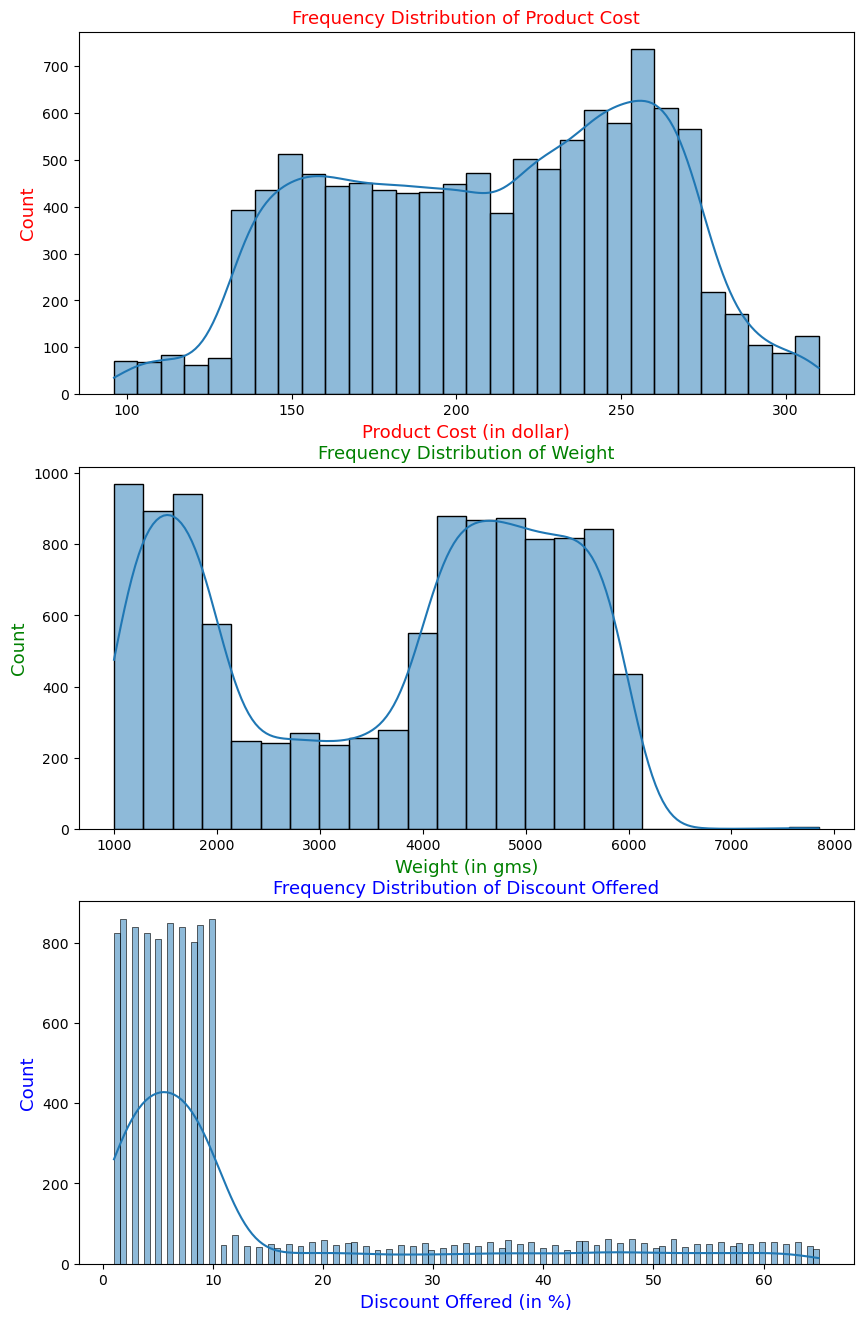

In [6]:
# We want to create multiple graphs so we use this function.
fig, axes = plt.subplots(3,1,figsize=(10,16))

# cumulative frequency distribution for 'Cost_of_the_Product'
sns.histplot(df.Cost_of_the_Product, kde=True, ax=axes[0])
ax=axes[0].set_title('Frequency Distribution of Product Cost',fontsize=13,color="red")
ax=axes[0].set_xlabel('Product Cost (in dollar)',fontsize=13,color="red")
ax=axes[0].set_ylabel('Count',fontsize=13,color="red")

# cumulative frequency distribution for 'Weight_in_gms'
sns.histplot(df.Weight_in_gms, kde=True, ax=axes[1])
ax=axes[1].set_title('Frequency Distribution of Weight',fontsize=13,color="green")
ax=axes[1].set_xlabel('Weight (in gms)',fontsize=13,color="green")
ax=axes[1].set_ylabel('Count',fontsize=13,color="green")

# cumulative frequency distribution for'Discount_offered'
sns.histplot(df.Discount_offered, kde=True, ax=axes[2])
ax=axes[2].set_title('Frequency Distribution of Discount Offered',fontsize=13,color="blue")
ax=axes[2].set_xlabel('Discount Offered (in %)',fontsize=13,color="blue")
ax=axes[2].set_ylabel('Count',fontsize=13,color="blue")

#### Based on the histograms above, we can make a couple of conlusion. The price of the majority of the products typically falls within a range of 240 to 275 dollar. Most of the products weigh between 1,000 and 2,000 gms or 4,000 and 6,000 gms. It is common for discounts of 1% to 10% to be offered, with some outliers falling in the upper quartile.

### Modelling
#### In the modelling fase, you want to specify what steps need to be taken in order to solve a particular problem.  

#### In order to confirm if the company really seems to have a problem with not having loyal customers, we will need to compare the amount of customers and amount of prior purchases. After this to find out what could be the possible reason for this, I am going to take a look at the number of orders made by: importance, gender and arrival time.

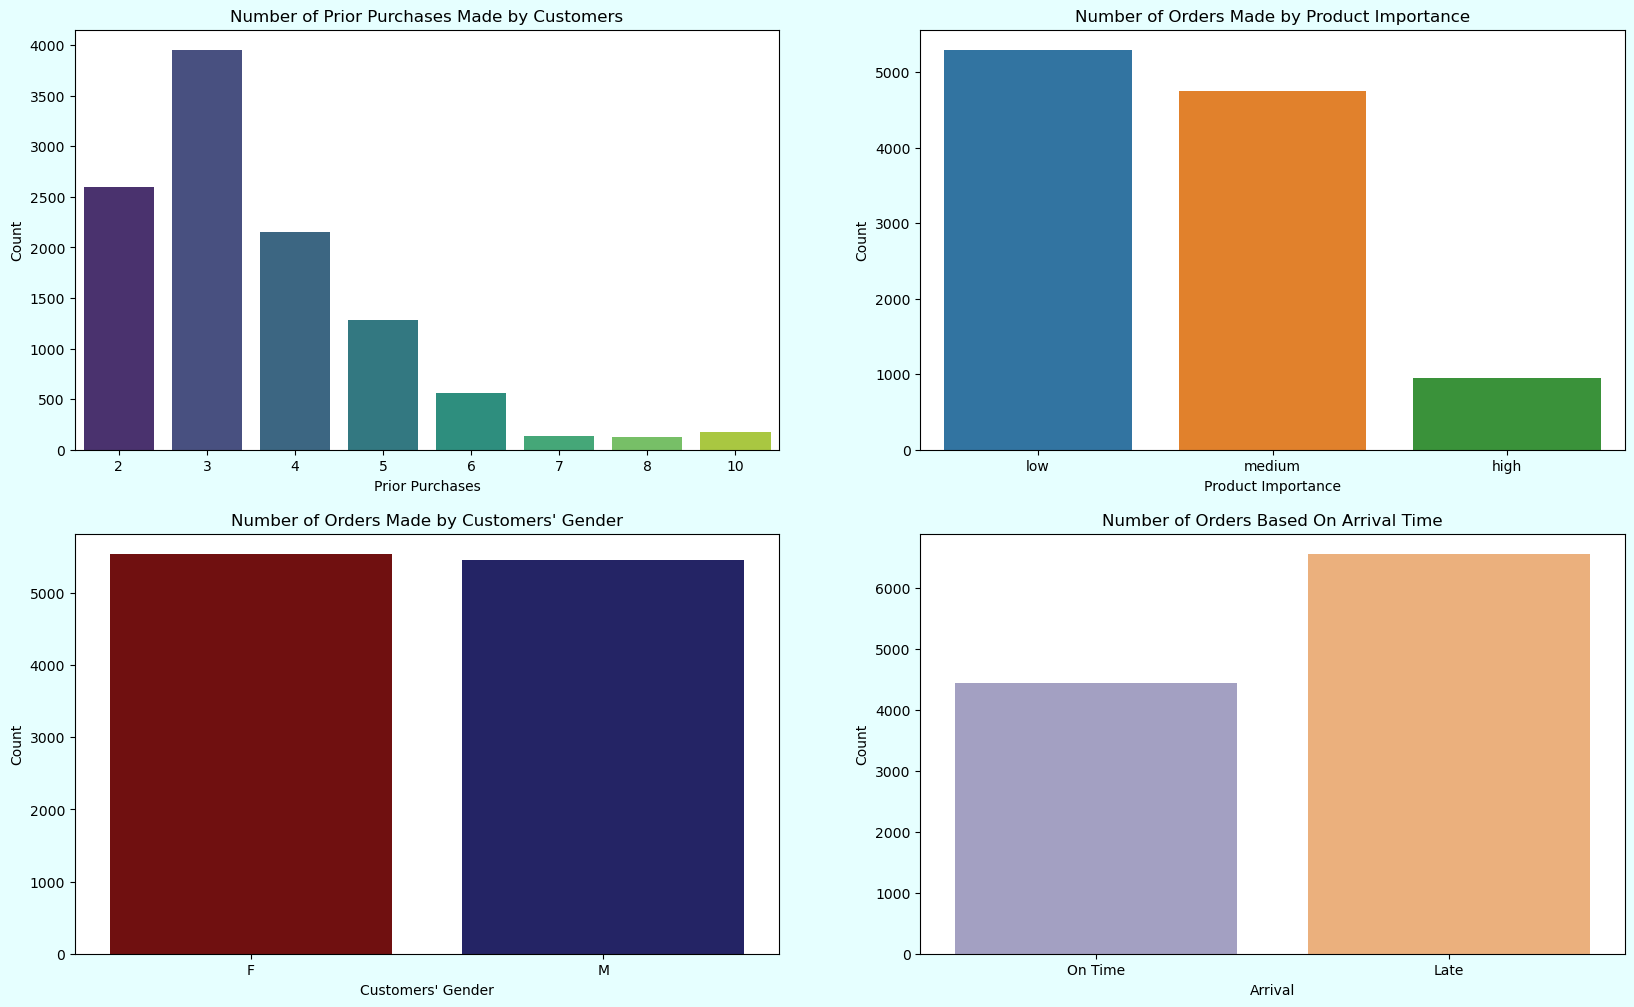

In [7]:
# We want to create multiple graphs so we use this function.
fig, axes = plt.subplots(2,2,figsize=(20,12),facecolor='#e6ffff')

# countplot for 'Prior_purchases'
sns.countplot(x=df["Prior_purchases"],ax=axes[0,0],palette='viridis')
axes[0,0].set_title('Number of Prior Purchases Made by Customers', fontsize=12)
axes[0,0].set_xlabel('Prior Purchases', fontsize=10)
axes[0,0].set_ylabel('Count', fontsize=10)

# countplot for'Product_importance'
sns.countplot(x=df["Product_importance"],ax=axes[0,1])
axes[0,1].set_title('Number of Orders Made by Product Importance', fontsize=12)
axes[0,1].set_xlabel('Product Importance', fontsize=10)
axes[0,1].set_ylabel('Count', fontsize=10)

# countplot for'Gender'
sns.countplot(x=df["Gender"],ax=axes[1,0],palette=['#800000','#191970'])
axes[1,0].set_title("Number of Orders Made by Customers' Gender", fontsize=12)
axes[1,0].set_xlabel("Customers' Gender", fontsize=10)
axes[1,0].set_ylabel('Count', fontsize=10)

# countplot for'Reached.on.Time_Y.N'
sns.countplot(x=df["Reached.on.Time_Y.N"],ax=axes[1,1],palette='tab20c_r')
axes[1,1].set_title('Number of Orders Based On Arrival Time', fontsize=12)
axes[1,1].set_xlabel('Arrival', fontsize=10)
axes[1,1].set_xticklabels(['On Time', 'Late'])
axes[1,1].set_ylabel('Count', fontsize=10);

#### Based on the graphs, the company does seem to have a problem with retaining loyal customers. The most customers have made 3 prior purchases. After this, it is quickly declining. In this case, the product importance and gender graphs, don't play a big roll in what I am searching for. This could have been better used in the data understanding part. What does seem to be the main reason for the decline in loyal customers is that More than half of the 10,999 orders out of the total amount were not delivered on time.